In [1]:
import pandas as pd

In [5]:
# Load the CSV files into dataframes

store_tender = pd.read_csv(r"C:\Users\ayode\Dropbox\PC\Downloads\STORE_TENDER.csv")
store_visits = pd.read_csv(r"C:\Users\ayode\Dropbox\PC\Downloads\STORE_VISITS.csv")
store_info = pd.read_csv(r"C:\Users\ayode\Dropbox\PC\Downloads\STORE_INFO.csv")

# Convert 'VISIT_DATES' to a datetime object
store_tender['VISIT_DATE'] = pd.to_datetime(store_tender['VISIT_DATE'])

### 2. Time Series Analysis on STORE_TENDER Sheet
###### To analyze the time series data of daily tender amounts:

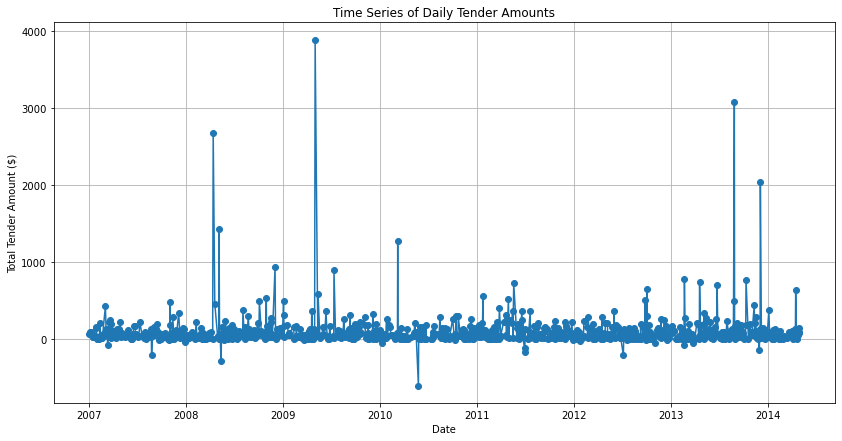

In [6]:
import matplotlib.pyplot as plt

# Group by 'VISIT_DATE' and sum 'TENDER_AMT' for each date
daily_tender = store_tender.groupby('VISIT_DATE')['TENDER_AMT'].sum().reset_index()

# Plot the time series of daily tender amounts
plt.figure(figsize=(14,7))
plt.plot(daily_tender['VISIT_DATE'], daily_tender['TENDER_AMT'], marker='o', linestyle='-')
plt.title('Time Series of Daily Tender Amounts')
plt.xlabel('Date')
plt.ylabel('Total Tender Amount ($)')
plt.grid(True)
plt.show()

In this analysis, I plotted the total tender amounts per day over time (2007 - 2014). This graph helps to understand the daily fluctuations in tender amounts, which can be influenced by factors such as day of the week, holidays, marketing campaigns, or other external events. Notable patterns, such as regular peaks or troughs, can indicate consumer behavior trends, like increased shopping on weekends or during specific seasons. There are peaks at similar times in 2008, 2009, 2010, albeit reduced significantly in 2010. There was a decline in amount of tenders between 2010 and 2013, but increased throght 2014.

#### 3. Analyze the Time Series Plot
###### Look for Trends: Is there a general upward or downward trend over time?
###### Seasonality: Are there any patterns that repeat at regular intervals (e.g., weekly, monthly, yearly)?
###### Anomalies: Are there any unusual spikes or drops in the data?

### 4. Descriptive Statistics

##### This is to calculate some basic statistics for the time series data, such as the mean, median, standard deviation, etc., to get a sense of the distribution and variability.

In [7]:
daily_tender_descriptive = daily_tender['TENDER_AMT'].describe()
print(daily_tender_descriptive)


count     924.000000
mean       91.487294
std       232.254888
min      -610.270000
25%        12.150000
50%        44.745000
75%       105.227500
max      3894.540000
Name: TENDER_AMT, dtype: float64


Descriptive statistics provide a summary of the central tendency, dispersion, and shape of your data's distribution. Key statistics like mean, median, and standard deviation help in understanding the typical value, the spread, and the variability of the data. For example, a high standard deviation in tender amounts could indicate that transaction values vary greatly from day to day.

#### 5. Rolling Averages
###### To smooth out short-term fluctuations and highlight longer-term trends or cycles, I will calculate a rolling average.

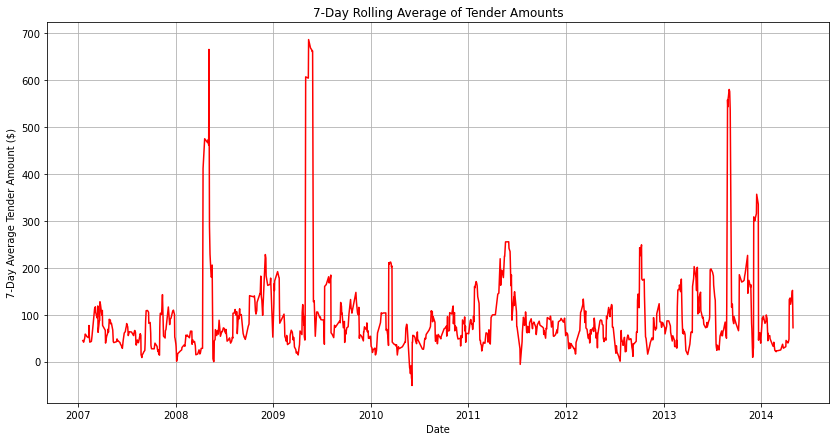

In [8]:
# Calculate a 7-day rolling average
daily_tender['7_day_avg'] = daily_tender['TENDER_AMT'].rolling(window=7).mean()

# Plot the rolling average
plt.figure(figsize=(14,7))
plt.plot(daily_tender['VISIT_DATE'], daily_tender['7_day_avg'], color='red')
plt.title('7-Day Rolling Average of Tender Amounts')
plt.xlabel('Date')
plt.ylabel('7-Day Average Tender Amount ($)')
plt.grid(True)
plt.show()


The 7-day rolling average smooths out short-term fluctuations and highlights longer-term trends in the data. This average is particularly useful for identifying broader trends that might be obscured by daily volatility. For example, a steadily increasing rolling average could suggest a period of growth in store transactions.

##### 6. Comparative Analysis Across Stores
###### This is to compare their performance in terms of visit numbers or tender amounts.

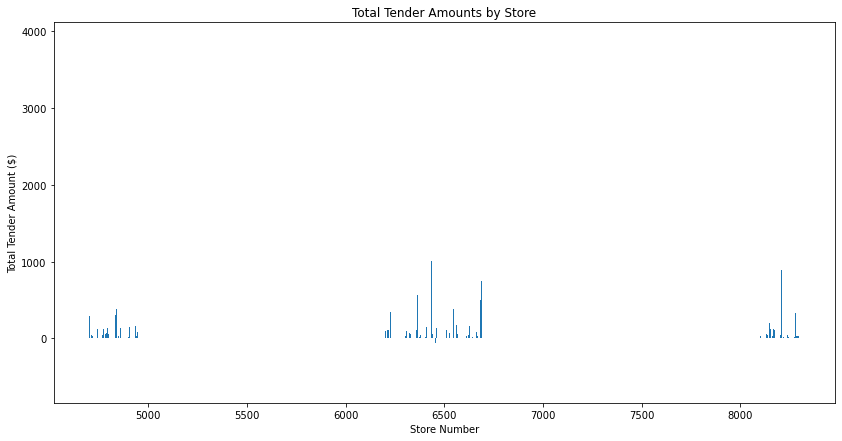

In [9]:
# Group by 'STORE_NBR' and sum 'TENDER_AMT' for each store
storewise_tender = store_tender.groupby('STORE_NBR')['TENDER_AMT'].sum().reset_index()

# Plotting the store-wise tender amounts
plt.figure(figsize=(14,7))
plt.bar(storewise_tender['STORE_NBR'], storewise_tender['TENDER_AMT'])
plt.title('Total Tender Amounts by Store')
plt.xlabel('Store Number')
plt.ylabel('Total Tender Amount ($)')
plt.show()

By comparing total tender amounts by store, we can identify which stores are performing better in terms of sales. This comparison can lead to insights about the factors that might be influencing performance, such as store location, size, or local demographics.

##### 7. Analyzing Tender Types
###### If different tender types are recorded (like cash, credit card, etc.), we can analyze the distribution of these tender types.

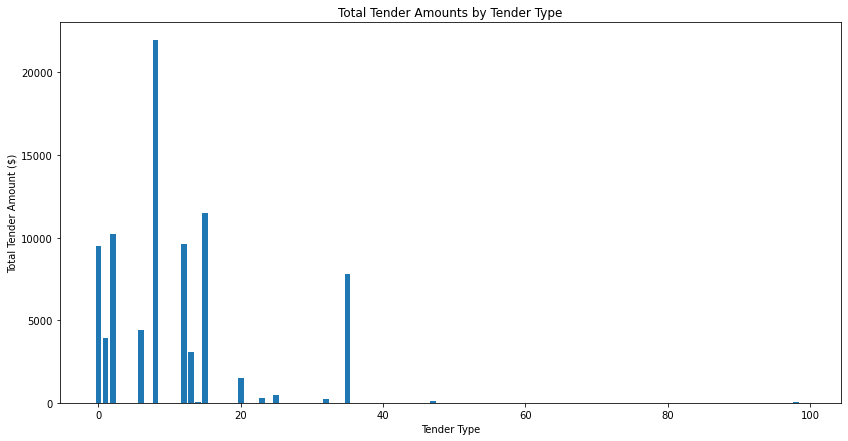

In [15]:
# Group by 'TENDER_TYPE' and sum 'TENDER_AMT' for each type
tender_type_analysis = store_tender.groupby('TENDER_TYPE')['TENDER_AMT'].sum().reset_index()

# Plotting the tender type analysis
plt.figure(figsize=(14,7))
plt.bar(tender_type_analysis['TENDER_TYPE'], tender_type_analysis['TENDER_AMT'])
plt.title('Total Tender Amounts by Tender Type')
plt.xlabel('Tender Type')
plt.ylabel('Total Tender Amount ($)')
plt.show()

Analyzing the distribution of tender types (e.g., cash, credit card) reveals consumer payment preferences and trends. For instance, a predominance of credit card transactions over cash could reflect a trend towards digital payment methods.

##### 8. Seasonal Analysis
###### To identify if there are particular times of the year with higher sales or visits.

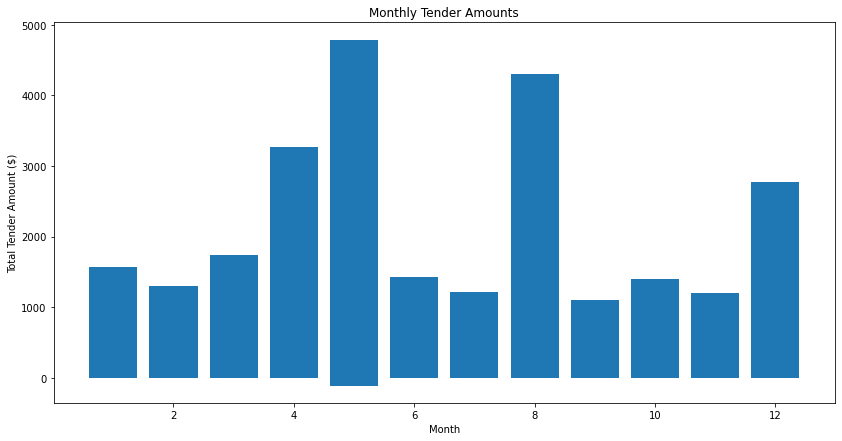

In [16]:
# Extracting month and year from 'VISIT_DATE'
store_tender['Year'] = store_tender['VISIT_DATE'].dt.year
store_tender['Month'] = store_tender['VISIT_DATE'].dt.month

# Grouping by year and month
monthly_tender = store_tender.groupby(['Year', 'Month'])['TENDER_AMT'].sum().reset_index()

# Plotting monthly tender amounts
plt.figure(figsize=(14,7))
plt.bar(monthly_tender['Month'], monthly_tender['TENDER_AMT'])
plt.title('Monthly Tender Amounts')
plt.xlabel('Month')
plt.ylabel('Total Tender Amount ($)')
plt.show()

Monthly or seasonal analysis helps in identifying patterns that occur at specific times of the year. This can be crucial for planning inventory, staffing, and marketing campaigns. For example, an increase in sales during the holiday season would indicate the need for more stock and staff during these months.

##### 9. Correlation Analysis
###### This is to check if there is a correlation between different numerical variables, such as store size and tender amounts, visit numbers, etc.

In [17]:
# Merging store info with tender data for correlation analysis
merged_data = pd.merge(store_info, store_tender, on='STORE_NBR')

# Calculating correlation
correlation_matrix = merged_data.corr()
print(correlation_matrix)

                     Unnamed: 0_x  DIVISION_NBR  STORE_NBR  REGION_NBR  \
Unnamed: 0_x             1.000000           NaN  -0.067159    0.009156   
DIVISION_NBR                  NaN           NaN        NaN         NaN   
STORE_NBR               -0.067159           NaN   1.000000   -0.111084   
REGION_NBR               0.009156           NaN  -0.111084    1.000000   
DISTRICT_NBR                  NaN           NaN        NaN         NaN   
SIZE_SQFT                0.068488           NaN  -0.015629   -0.046989   
OPEN_STATUS             -0.094037           NaN   0.671337    0.044155   
EXPANSION_SIZE_SQFT     -0.101388           NaN   0.653243   -0.002973   
ZIP_CODE                 0.125289           NaN  -0.002579    0.005179   
PHONE_NBR               -0.048636           NaN   0.000129    0.024642   
GEOGRAPHIC_ZONE          0.006761           NaN   0.021715   -0.060352   
APPAREL_ZONE                  NaN           NaN        NaN         NaN   
SIZECLASS                     NaN     

The correlation matrix quantitatively assesses the strength and direction of relationships between pairs of variables. A high positive correlation indicates that as one variable increases, the other tends to increase too, while a high negative correlation indicates an inverse relationship.

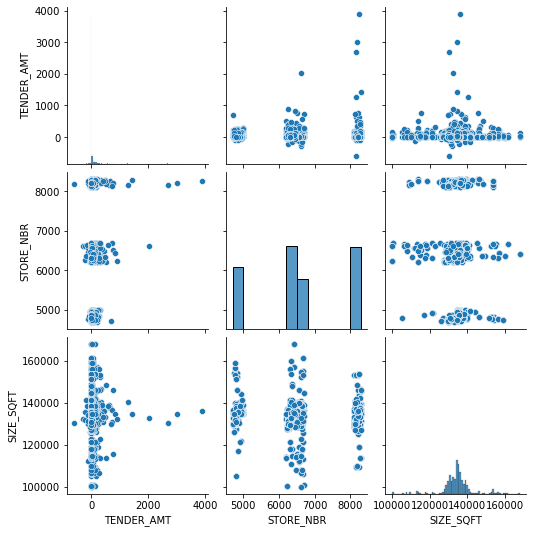

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merging store info with tender data
merged_data = pd.merge(store_info, store_tender, on='STORE_NBR')

# Selecting the columns for the scatter matrix
selected_columns = merged_data[['TENDER_AMT', 'STORE_NBR', 'SIZE_SQFT']]

# Creating the scatter matrix
sns.pairplot(selected_columns)
plt.show()



The scatter matrix visualizes the pairwise relationships between multiple variables and their individual distributions. By examining these plots, we can identify potential correlations, trends, or outliers. For example, a positive correlation between store size and tender amounts might suggest that larger stores generate higher sales.